In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
import os
import re

In [2]:
folder_folders = os.walk("/home/alone/Documents/Destructive/data_19_22_feb_2018")
folder_list = []
folder_names = []
for root, dirs, files in os.walk("/home/alone/Documents/Destructive/data_19_22_feb_2018", topdown=False):
    for name in dirs:
        if not os.path.isfile(os.path.join(root, name)):
            folder_list.append(os.path.join(root, name))
            folder_names.append(name)
            print (os.path.join(root, name))
# print(folder_list)
print(folder_names)

all_data_dict = {}
for k in range(len(folder_list)):
    all_data = pd.DataFrame(columns=["Lambda"])
    file_list = os.listdir(folder_list[k])
    for j in range(len(file_list)):
        raw_data = open(os.path.join(folder_list[k],file_list[j]), "r")
        f = raw_data.readlines()
        usable_part = f[78:459]
        usable_part = [i.split("  ") for i in usable_part]
        data = pd.DataFrame(usable_part)
        for index,rows in data.iterrows():
            re_pattern = r"(.*)\n"
            data.set_value(index, 2, re.search(re_pattern, rows[2]).group(1))
        data.columns=["Lambda","target","ref"]
        data.ref=pd.to_numeric(data.ref)
        data.target=pd.to_numeric(data.target)
        Reflectance=(data.target)/(data.ref)
        data=data.drop("ref",1)
        data=data.drop("target",1)
        if all_data["Lambda"].empty:
            all_data["Lambda"] = data["Lambda"]
        all_data["R"+str(j+1)]=Reflectance
    all_data_dict [folder_names[k]] = all_data
    
print("all_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder ")

/home/alone/Documents/Destructive/data_19_22_feb_2018/D1R1_destructive
/home/alone/Documents/Destructive/data_19_22_feb_2018/D2R1_destructive
['D1R1_destructive', 'D2R1_destructive']


/home/alone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


all_data_dict is a dictionary where key is folder name and stored values are dataFrame consists of reflectance values of that folder 


<IPython.core.display.Javascript object>


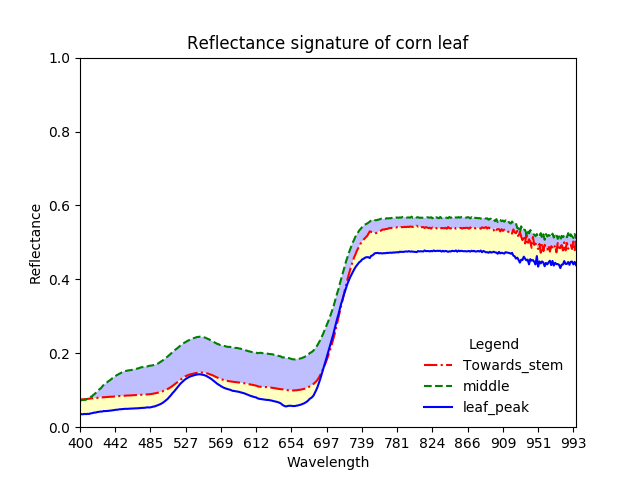

0
27
54
81
108
135
162
189
216
243
270
297
324
351
378


In [40]:
plt.figure()
D1R1=all_data_dict['D1R1_destructive']
#In this folder R1 to R27 is from D1R1 all 9 subplots (3 reading from one leaf of each subplot. R28 to R36 is from
#very first plot of D1R1 i.e. D1R1I3N3 3 readings from top leaf then 3 from middle then 3 from bottom)
plt.plot(D1R1.Lambda,D1R1.R1, '-.r')
plt.plot(D1R1.R2, '--g')
plt.plot(D1R1.R3, 'b')
# plt.plot(D1R1.Lambda,D1R1.R4, color='g')
# plt.plot(D1R1.Lambda,D1R1.R5, color='g')
# plt.plot(D1R1.Lambda,D1R1.R6, color='g')
# plt.plot(D1R1.Lambda,D1R1.R7, color='b')
# plt.plot(D1R1.Lambda,D1R1.R8, color='b')
# plt.plot(D1R1.Lambda,D1R1.R9, color='b')
# plt.plot(D1R1.Lambda,D1R1.R10, color='k')
# plt.plot(D1R1.Lambda,D1R1.R11, color='k')
# plt.plot(D1R1.Lambda,D1R1.R12, color='k')
# plt.plot(D1R1.Lambda,D1R1.R13, color='o')
# plt.plot(D1R1.Lambda,D1R1.R14, color='o')
# plt.plot(D1R1.Lambda,D1R1.R15, color='o')
# plt.plot(D1R1.Lambda,D1R1.R16, color='c')
# plt.plot(D1R1.Lambda,D1R1.R17, color='c')
# plt.plot(D1R1.Lambda,D1R1.R18, color='c')
# plt.plot(D1R1.Lambda,D1R1.R19, color='y')
# plt.plot(D1R1.Lambda,D1R1.R20, color='y')
# plt.plot(D1R1.Lambda,D1R1.R21, color='y')
# plt.plot(D1R1.Lambda,D1R1.R22, color='v')
# plt.plot(D1R1.Lambda,D1R1.R23, color='v')
# plt.plot(D1R1.Lambda,D1R1.R24, color='v')
# plt.plot(D1R1.Lambda,D1R1.R25, color='r')
# plt.plot(D1R1.Lambda,D1R1.R26, color='r')
# plt.plot(D1R1.Lambda,D1R1.R27, color='r')
# plt.plot(D1R1.Lambda,D1R1.R28, color='r')
# plt.plot(D1R1.Lambda,D1R1.R29, color='r')
# plt.plot(D1R1.Lambda,D1R1.R30, color='r')
# plt.plot(D1R1.Lambda,D1R1.R31, color='r')
# plt.plot(D1R1.Lambda,D1R1.R32, color='r')
# plt.plot(D1R1.Lambda,D1R1.R33, color='r')
# plt.plot(D1R1.Lambda,D1R1.R34, color='r')
# plt.plot(D1R1.Lambda,D1R1.R35, color='r')
# plt.plot(D1R1.Lambda,D1R1.R36, color='r')

plt.xlim(400.35,998.65)
locs, labels = plt.xticks()
loc=[]
label = []
diff = (998.65-400.35)/len(locs)
count=1
for i in range(0,len(locs),27):
    try:
        label.append(int(400.35+(diff*i)))
        loc.append(locs[i])
        print(i, )
    except:
        print(str(labels[i]))
    count += 1
plt.xticks(loc,label)
plt.show()

ax=plt.gca()
ax.axis([400.35,998.65,0,1])
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Reflectance signature of corn leaf")
plt.legend(['Towards_stem','middle','leaf_peak'],loc=4, frameon=False, title='Legend')
plt.gca().fill_between(range(len(D1R1.R1)),D1R1.R1, D1R1.R2, facecolor='blue', alpha=0.25)
plt.gca().fill_between(range(len(D1R1.R1)),D1R1.R1, D1R1.R3, facecolor='yellow', alpha=0.25)

x = plt.gca().xaxis

# rotate the tick labels for the x axis
# for item in x.get_ticklabels():
#     item.set_rotation(90)
# plt.subplots_adjust(bottom=0.25)

<IPython.core.display.Javascript object>


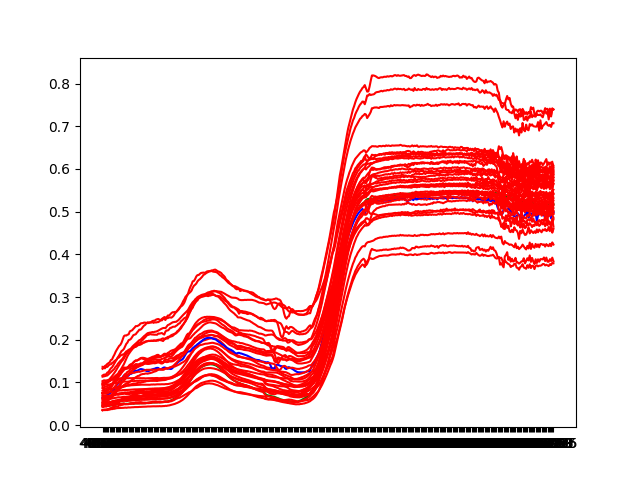

In [12]:
plt.figure()
D2R1=all_data_dict['D2R1_destructive']
#In this folder R1 to R27 is from D1R1 all 9 subplots (3 reading from one leaf of each subplot. R28 to R36 is from
#very first plot of D2R1 i.e. D2R1I2N3 3 readings from top leaf then 3 from middle tyhen 3 from bottom)
plt.plot(D2R1.Lambda,D2R1.R1, color ='r')
plt.plot(D2R1.Lambda,D2R1.R2, color ='r')
plt.plot(D2R1.Lambda,D2R1.R3, color ='r')
plt.plot(D2R1.Lambda,D2R1.R4, color ='r')
plt.plot(D2R1.Lambda,D2R1.R5, color ='b')
plt.plot(D2R1.Lambda,D2R1.R6, color ='g')
plt.plot(D2R1.Lambda,D2R1.R7, color ='r')
plt.plot(D2R1.Lambda,D2R1.R8, color ='r')
plt.plot(D2R1.Lambda,D2R1.R9, color ='r')
plt.plot(D2R1.Lambda,D2R1.R10, color ='r')
plt.plot(D2R1.Lambda,D2R1.R11, color ='r')
plt.plot(D2R1.Lambda,D2R1.R12, color ='r')
plt.plot(D2R1.Lambda,D2R1.R13, color ='r')
plt.plot(D2R1.Lambda,D2R1.R14, color ='r')
plt.plot(D2R1.Lambda,D2R1.R15, color ='r')
plt.plot(D2R1.Lambda,D2R1.R16, color ='r')
plt.plot(D2R1.Lambda,D2R1.R17, color ='r')
plt.plot(D2R1.Lambda,D2R1.R18, color ='r')
plt.plot(D2R1.Lambda,D2R1.R19, color ='r')
plt.plot(D2R1.Lambda,D2R1.R20, color ='r')
plt.plot(D2R1.Lambda,D2R1.R21, color ='r')
plt.plot(D2R1.Lambda,D2R1.R22, color ='r')
plt.plot(D2R1.Lambda,D2R1.R23, color ='r')
plt.plot(D2R1.Lambda,D2R1.R24, color ='r')
plt.plot(D2R1.Lambda,D2R1.R25, color ='r')
plt.plot(D2R1.Lambda,D2R1.R26, color ='r')
plt.plot(D2R1.Lambda,D2R1.R27, color ='r')
plt.plot(D2R1.Lambda,D2R1.R28, color ='r')
plt.plot(D2R1.Lambda,D2R1.R29, color ='r')
plt.plot(D2R1.Lambda,D2R1.R30, color ='r')
plt.plot(D2R1.Lambda,D2R1.R31, color ='r')
plt.plot(D2R1.Lambda,D2R1.R32, color ='r')
plt.plot(D2R1.Lambda,D2R1.R33, color ='r')
plt.plot(D2R1.Lambda,D2R1.R34, color ='r')
plt.plot(D2R1.Lambda,D2R1.R35, color ='r')
plt.plot(D2R1.Lambda,D2R1.R36, color ='r')
